In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


## 1. 准备并处理数据

### 1.1 准备数据

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
import pprint

pprint.pprint(housing.data[0:3])
pprint.pprint(housing.target[0:3])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02]])
array([4.526, 3.585, 3.521])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target,)
#                                                             random_state= 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, )
#                                                       random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


### 1.2 数据归一化

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

## 2. 建立模型

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## 3. 训练模型

In [7]:
history = model.fit(x_train_scaled, y_train, 
                   validation_data = (x_valid_scaled, y_valid),
                   epochs = 100,
                   callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.9047 - val_loss: 0.5354
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5613 - val_loss: 0.4843
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4747 - val_loss: 0.4593
Epoch 4/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4570 - val_loss: 0.4510
Epoch 5/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4407 - val_loss: 0.4403
Epoch 6/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4325 - val_loss: 0.4353
Epoch 7/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4246 - val_loss: 0.4279
Epoch 8/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4210 - val_loss: 0.4291
Epoch 9/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.415

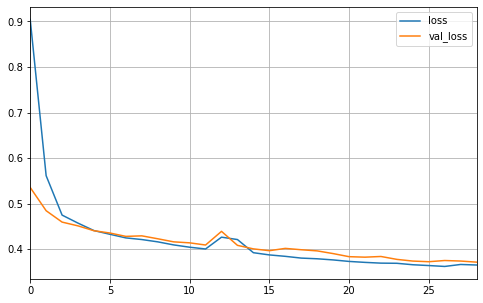

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
#     plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

## 4. 模型预测

In [10]:
model.evaluate(x_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3594577484352644